In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# set size of plots
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# data file path
data = "../data"

output = "../output/"

In [3]:
# read in csv
# import raw data
aviation_safety_raw = pd.read_csv(data+'/aviation-data-table.csv')

In [4]:
aviation_safety_raw.head()

,us_air_carrier_category,year,all_accidents,fatal_accidents,on_board_fatalities,flight_hours,flight_miles,accident_rate_per_100000_flight_hours,fatal_accident_rate_per_100000_flight_hours,accident_rate_per_million_miles_flown,fatal_accident_rate_per_million_miles_flown
0,Large airlines,1997,43,3,2,"15,061,662","6,339,432,000",0.2855,0.0199,0.0068,0.0005
1,Large airlines,1998,41,1,0,"15,921,447","6,343,690,000",0.2575,0.0063,0.0065,0.0002
2,Large airlines,1999,40,2,11,"16,693,365","6,689,327,000",0.2400,0.0120,0.0060,0.0003
3,Large airlines,2000,49,2,89,"17,478,519","7,152,260,000",0.2800,0.0110,0.0069,0.0003
4,Large airlines,2001,41,6,525,"17,157,858","6,994,939,000",0.2160,0.0120,0.0053,0.0003


In [5]:
aviation_safety = aviation_safety_raw

In [6]:
# drop columns we don't need for this analysis
aviation_safety = aviation_safety.drop(['all_accidents', 'fatal_accidents', 'on_board_fatalities', 'flight_hours',
'flight_hours', 'flight_miles'], axis=1)

In [19]:
aviation_safety.head(25)

,us_air_carrier_category,year,accident_rate_per_100000_flight_hours,fatal_accident_rate_per_100000_flight_hours,accident_rate_per_million_miles_flown,fatal_accident_rate_per_million_miles_flown
0,Large airlines,1997,0.2855,0.0199,0.0068,0.0005
1,Large airlines,1998,0.2575,0.0063,0.0065,0.0002
2,Large airlines,1999,0.2400,0.0120,0.0060,0.0003
3,Large airlines,2000,0.2800,0.0110,0.0069,0.0003
4,Large airlines,2001,0.2160,0.0120,0.0053,0.0003
5,Large airlines,2002,0.2030,0.0000,0.0049,0.0000
6,Large airlines,2003,0.3020,0.0120,0.0073,0.0003
7,Large airlines,2004,0.1260,0.0050,0.0030,0.0001
8,Large airlines,2005,0.1820,0.0160,0.0043,0.0004
9,Large airlines,2006,0.1390,0.0110,0.0033,0.0003


In [41]:
# define function
def pivot_for_plotting(df, value):
    df_pivot = df.pivot(index='year', columns='us_air_carrier_category', values=value)

    # drop index
    df_pivot = df_pivot.reset_index()

    # filter 2020 due to covid
    df_pivot = df_pivot[df_pivot['year'] != 2020]
 
    return df_pivot


In [47]:
# pivot for fatal_accident_rate_per_100000_flight_hours 
aviation_safety_acc_flight_hours = pivot_for_plotting(aviation_safety, 'accident_rate_per_100000_flight_hours')

# pivot for fatal_accident_rate_per_million_miles_flown 
aviation_safety_acc_miles_flown = pivot_for_plotting(aviation_safety, 'accident_rate_per_million_miles_flown')

# Plot

In [67]:
# define plot
def plot(df, airline_type, label, title, ylabel, output_name):
    x = df['year']
    plt.plot(x, df[airline_type], label = str(label), linestyle="-")
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.legend()
    plt.title(str(title))
    plt.xlabel("Year")
    plt.ylabel(str(ylabel))
    plt.savefig(output+str(output_name),bbox_inches='tight')
    plt.show()

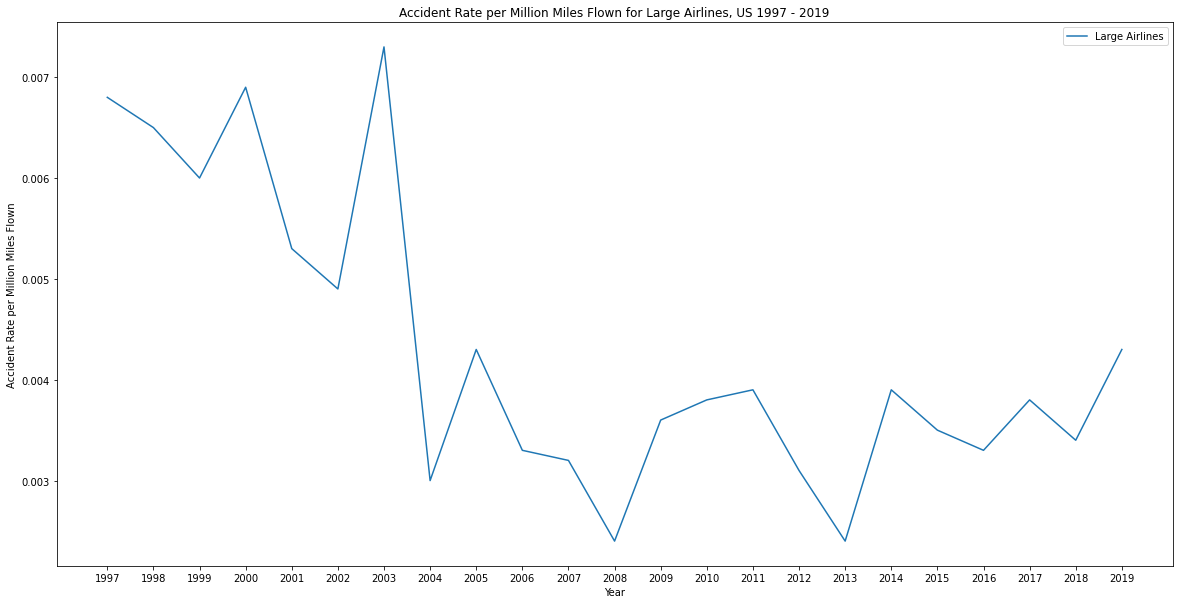

In [69]:
# plot large airlines miles flown
plot(aviation_safety_acc_miles_flown, 'Large airlines', 'Large Airlines', 
    'Accident Rate per Million Miles Flown for Large Airlines, US 1997 - 2019',
    'Accident Rate per Million Miles Flown',
    'large_airlines_accident_rate_per_million_miles_flown.jpg')

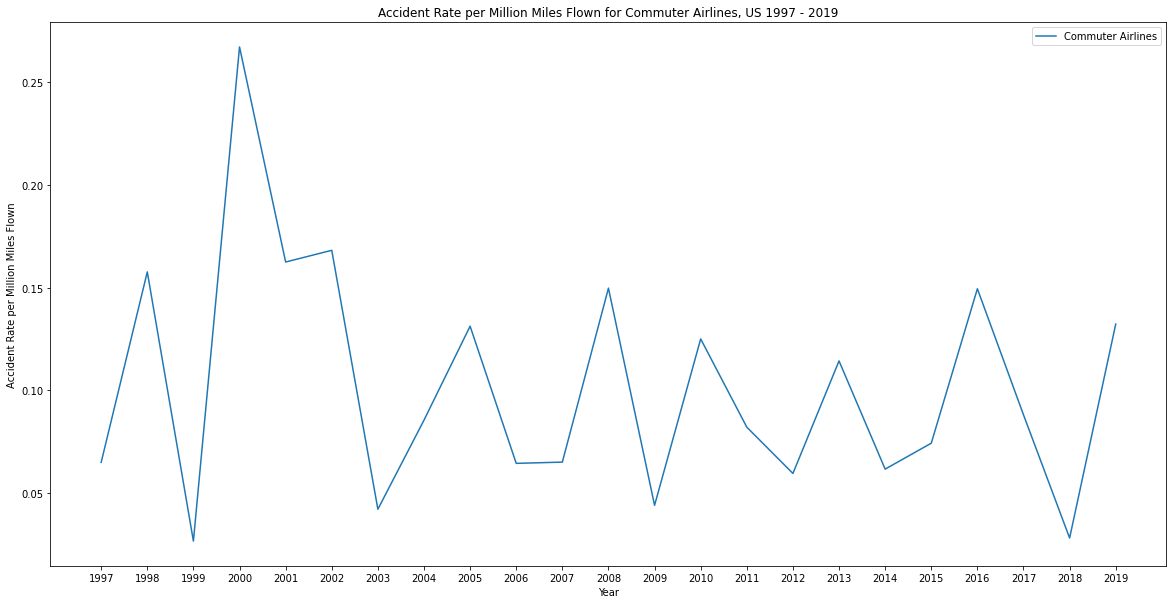

In [70]:
# plit commuter airlines miles flown
plot(aviation_safety_acc_miles_flown, 'Commuter airlines', 'Commuter Airlines', 
    'Accident Rate per Million Miles Flown for Commuter Airlines, US 1997 - 2019',
    'Accident Rate per Million Miles Flown',
    'commuter_airlines_accident_rate_per_million_miles_flown.jpg')